# Company: Disney

# Sentiment Analysis

In [ ]:
pip install pandas
pip install transformers
pip install scipy
pip install matplotlib
pip install wordcloud
pip install nltk
pip install sklearn
pip install tensorflow
pip install keras
pip install prophet
pip install seaborn

In [2]:
import pandas as pd
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from scipy.special import softmax


In [1]:

roberta = "cardiffnlp/twitter-roberta-base-sentiment"
model = AutoModelForSequenceClassification.from_pretrained(roberta)
tokenizer = AutoTokenizer.from_pretrained(roberta)

labels = ['Negative', 'Neutral', 'Positive']

news_df = pd.read_csv('NewsSentiment_DIS.csv', encoding='utf-8')

# Perform sentiment analysis
news_proc_list = []
sentiment_list = []

for headlines in news_df['Headlines']:
    news_words = []
    for word in headlines.split(' '):
        if word.startswith('http'):
            word = "http"
        news_words.append(word)

    news_proc = " ".join(news_words)
    news_proc_list.append(news_proc)

    encoder_news = tokenizer(news_proc, return_tensors='pt')
    output = model(**encoder_news)
    scores = output.logits.detach().numpy()[0]
    scores = softmax(scores)

    sentiment = {label: score for label, score in zip(labels, scores)}
    sentiment_list.append(sentiment)

# Append sentiment labels
sentiment_df = pd.DataFrame(sentiment_list)
news_df = pd.concat([news_df, sentiment_df], axis=1)

# Determine sentiment with the highest value
news_df['Actual Sentiment'] = news_df[labels].idxmax(axis=1)
news_df['Sentiment value'] = news_df[labels].max(axis=1)

# Save the updated DataFrame back to the same file
news_df.to_csv('NewsSentiment_DIS.csv', encoding='utf-8', index=False)


NameError: name 'AutoModelForSequenceClassification' is not defined

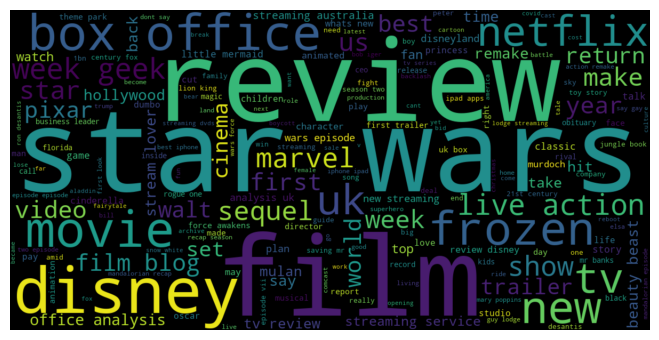

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import pandas as pd
from datetime import datetime

data = pd.read_csv('NewsSentiments_DIS.csv', encoding='latin-1')

text = ' '.join(data['Headlines'].astype(str).tolist())

# Remove non-ASCII characters
text = ''.join(character for character in text if ord(character) < 128)

# Adding more stop words
additional_stop_words = ['Disney']

#Converting additional words to lower case
additional_stop_words_lower = [word.lower() for word in additional_stop_words]

additional_stop_words_lower

# Remove stopwords
stop_words = set(stopwords.words('english') + additional_stop_words + additional_stop_words_lower)
tokens = text.lower().split()
filtered_tokens = [token for token in tokens if token not in stop_words]
filtered_text = ' '.join(filtered_tokens)

# Generate word cloud
wordcloud = WordCloud(width=1200, height=600, background_color='Black').generate(filtered_text)

# Display the word cloud
plt.figure(figsize=(10, 3.5), tight_layout=True)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

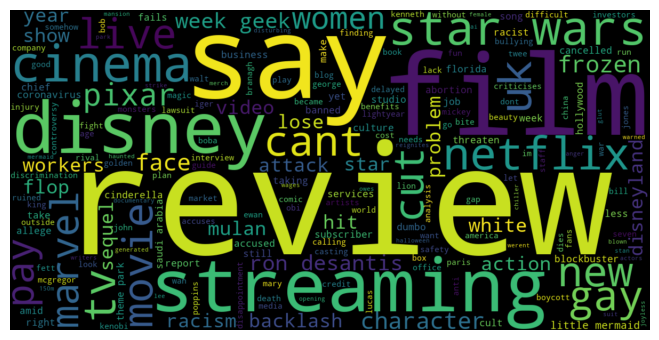

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import pandas as pd

data = pd.read_csv('NewsSentiments_DIS.csv', encoding='latin-1')

negative_headlines = data[data['Actual Sentiment'] == 'Negative']['Headlines'].astype(str).tolist()

# Combine all the negative headlines into a single string
text = ' '.join(negative_headlines)

# Remove non-ASCII characters
text = ''.join(character for character in text if ord(character) < 128)

# Adding more stop words
additional_stop_words = ['Disney']

# Converting additional words to lower case
additional_stop_words_lower = [word.lower() for word in additional_stop_words]

# Remove stopwords
stop_words = set(stopwords.words('english') + additional_stop_words + additional_stop_words_lower)
tokens = text.lower().split()
filtered_tokens = [token for token in tokens if token not in stop_words]
filtered_text = ' '.join(filtered_tokens)

# Generate word cloud
wordcloud = WordCloud(width=1200, height=600, background_color='Black').generate(filtered_text)

# Display the word cloud
plt.figure(figsize=(10, 3.5), tight_layout=True)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


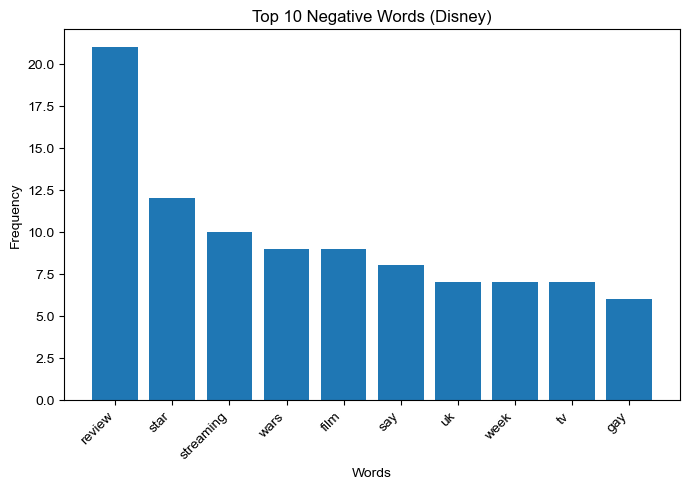

In [3]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import pandas as pd
from collections import Counter
import re

data = pd.read_csv('NewsSentiments_DIS.csv', encoding='latin-1')

# Filter out negative headlines
negative_headlines = data[data['Actual Sentiment'] == 'Negative']['Headlines'].astype(str).tolist()

# Combine all the negative headlines into a single string
text = ' '.join(negative_headlines)

# Remove non-ASCII characters
text = ''.join(character for character in text if ord(character) < 128)


# Adding more stop words
additional_stop_words = ['Disney']

# Converting additional words to lower case
additional_stop_words_lower = [word.lower() for word in additional_stop_words]

# Remove stopwords
stop_words = set(stopwords.words('english') + additional_stop_words + additional_stop_words_lower)

# Split text into words and clean them
tokens = re.findall(r'\b\w+\b', text.lower())
filtered_tokens = [token for token in tokens if token not in stop_words]

# Get top 20 words with negative sentiments
word_counts = Counter(filtered_tokens)
top_10_negative_words = word_counts.most_common(10)

# Extract words and counts for the histogram
words, counts = zip(*top_10_negative_words)

# Create a histogram with Arial font
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'

plt.figure(figsize=(7, 5))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Negative Words (Disney)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


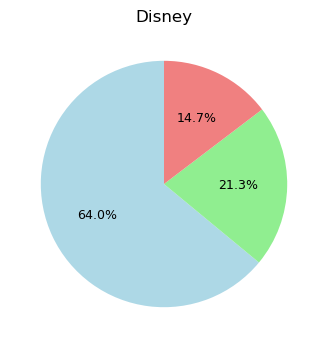

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('NewsSentiments_DIS.csv', encoding='latin-1')

# Get unique sentiment labels
sentiment_labels = data['Actual Sentiment'].unique()

# Define custom colors for sentiment labels
colors = {'Negative': 'lightcoral', 'Positive': 'lightgreen', 'Neutral': 'lightblue'}

# Calculate the percentage of each sentiment label
percentage_values = [(data['Actual Sentiment'] == label).mean() * 100 for label in sentiment_labels]

# Plot Sentiment Pie Chart with custom colors
plt.figure(figsize=(6, 4))
_, texts, _ = plt.pie(percentage_values, autopct='%1.1f%%', startangle=90,textprops={'fontsize': 9}, colors=[colors[label] for label in sentiment_labels])
plt.title('Disney')


plt.show()


# LSTM applied on original DIS dataset

In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


df = pd.read_csv('DIS.csv')

# Using MinMaxScaler to scale the features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.drop('Date', axis=1))

# Create sequences of 60 days and predict the next day
X = []
y = []

for i in range(60, len(scaled_data) - 30): #-30 is used since we are predicting price for last 30 days
    X.append(scaled_data[i-60:i])
    y.append(np.where(scaled_data[i][-2] > scaled_data[i-1][-2], 1, 0))  

X, y = np.array(X), np.array(y)

# Define the LSTM model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=20, batch_size=32)

# Prepare the test data
X_test = []
y_test = []

for i in range(len(scaled_data) - 30, len(scaled_data)):
    X_test.append(scaled_data[i-60:i])
    y_test.append(np.where(scaled_data[i][-2] > scaled_data[i-1][-2], 1, 0))

X_test, y_test = np.array(X_test), np.array(y_test)

# Predicting
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).ravel()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)




Epoch 1/20
80/80 [==============================] - 10s 52ms/step - loss: 0.6945 - accuracy: 0.5014
Epoch 2/20
80/80 [==============================] - 4s 53ms/step - loss: 0.6932 - accuracy: 0.5108
Epoch 3/20
80/80 [==============================] - 4s 54ms/step - loss: 0.6930 - accuracy: 0.5045
Epoch 4/20
80/80 [==============================] - 4s 55ms/step - loss: 0.6926 - accuracy: 0.5206
Epoch 5/20
80/80 [==============================] - 4s 52ms/step - loss: 0.6926 - accuracy: 0.5100
Epoch 6/20
80/80 [==============================] - 5s 59ms/step - loss: 0.6926 - accuracy: 0.5155
Epoch 7/20
80/80 [==============================] - 5s 60ms/step - loss: 0.6926 - accuracy: 0.5261
Epoch 8/20
80/80 [==============================] - 4s 53ms/step - loss: 0.6922 - accuracy: 0.5143
Epoch 9/20
80/80 [==============================] - 4s 52ms/step - loss: 0.6923 - accuracy: 0.5143
Epoch 10/20
80/80 [==============================] - 4s 52ms/step - loss: 0.6924 - accuracy: 0.5186
Epoch 11

# LSTM Method applied on DIS technical indicators

Epoch 1/20
80/80 [==============================] - 10s 60ms/step - loss: 0.6578 - accuracy: 0.6299
Epoch 2/20
80/80 [==============================] - 5s 63ms/step - loss: 0.6265 - accuracy: 0.6641
Epoch 3/20
80/80 [==============================] - 5s 58ms/step - loss: 0.5745 - accuracy: 0.7087
Epoch 4/20
80/80 [==============================] - 5s 58ms/step - loss: 0.4082 - accuracy: 0.8236
Epoch 5/20
80/80 [==============================] - 6s 72ms/step - loss: 0.3132 - accuracy: 0.8691
Epoch 6/20
80/80 [==============================] - 5s 57ms/step - loss: 0.2728 - accuracy: 0.8789
Epoch 7/20
80/80 [==============================] - 4s 54ms/step - loss: 0.2584 - accuracy: 0.8820
Epoch 8/20
80/80 [==============================] - 5s 61ms/step - loss: 0.2526 - accuracy: 0.8789
Epoch 9/20
80/80 [==============================] - 4s 52ms/step - loss: 0.2468 - accuracy: 0.8848
Epoch 10/20
80/80 [==============================] - 4s 54ms/step - loss: 0.2397 - accuracy: 0.8930
Epoch 11

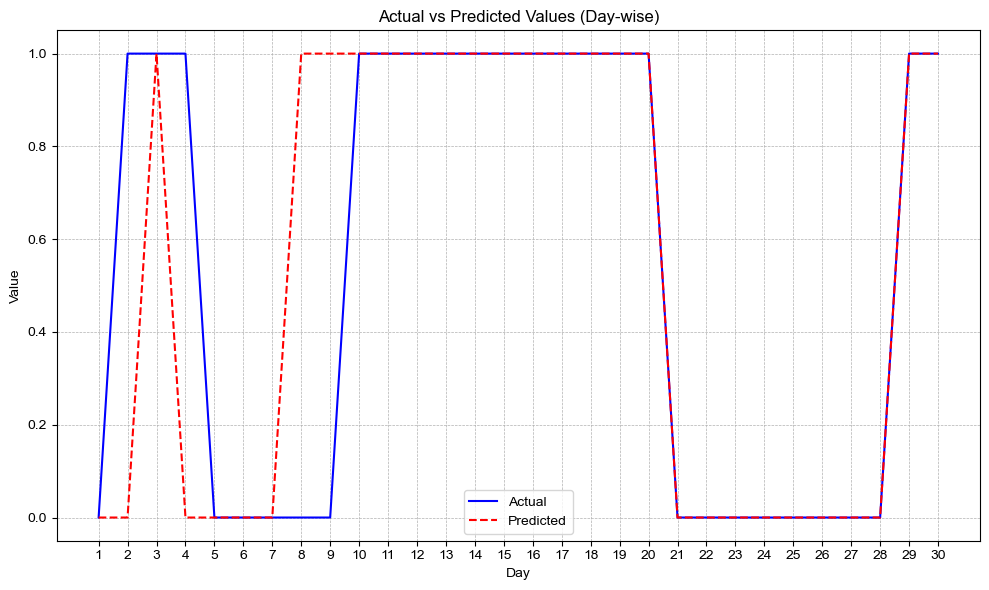

In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


df = pd.read_csv('DIS_TechIndicators.csv')


# Using MinMaxScaler to scale the features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.drop('Date', axis=1))

# Create sequences of 60 days and predict the next day
X = []
y = []

for i in range(60, len(scaled_data) - 30):  # stopping at -30 to leave last 30 days for testing
    X.append(scaled_data[i-60:i])
    y.append(np.where(scaled_data[i][-2] > scaled_data[i-1][-2], 1, 0))  
    
X, y = np.array(X), np.array(y)


# Define the LSTM model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=20, batch_size=32)

# Prepare the test data for the last 30 days
X_test = []

for i in range(len(scaled_data) - 30, len(scaled_data)):
    X_test.append(scaled_data[i-60:i])
 

X_test = np.array(X_test)

# Predicting
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int).ravel()


# Generate y_test
y_test = []
for i in range(len(scaled_data) - 30, len(scaled_data)):
    y_test.append(np.where(scaled_data[i][-2] > scaled_data[i-1][-2], 1, 0))

y_test = np.array(y_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

days = range(1, len(y_test) + 1)

plt.figure(figsize=(10,6))
plt.title('Actual vs Predicted Values (Day-wise)')
plt.plot(days, y_test, color='blue', label='Actual')
plt.plot(days, y_pred_binary, color='red', linestyle='dashed', label='Predicted')

plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(days)  
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


# Combining Stock prices and news sentiments data

In [23]:
import pandas as pd

dis_tech = pd.read_csv('DIS_TechIndicators.csv')
news_sentiments = pd.read_csv('NewsSentiments_DIS.csv', encoding='ISO-8859-1')

avg_sentiments = news_sentiments.groupby('Date').agg({
    'Actual Sentiment': 'first',
    'Sentiment value': 'mean'
}).reset_index()

dis_tech['Date'] = pd.to_datetime(dis_tech['Date'], format='%d/%m/%Y')
avg_sentiments['Date'] = pd.to_datetime(avg_sentiments['Date'], format='%d/%m/%Y')

combined = pd.merge(dis_tech, avg_sentiments[['Date', 'Actual Sentiment', 'Sentiment value']], on='Date', how='left')

# Propagate weekend sentiments to the next available weekday
for index, row in avg_sentiments.iterrows():
    date = row['Date']
    if date.weekday() > 4:  # Check if the date is a weekend
        next_weekday = date + pd.Timedelta(days=1)
        while next_weekday.weekday() > 4 or next_weekday not in combined['Date'].values:
            next_weekday += pd.Timedelta(days=1)

        # If sentiment value for next_weekday exists, average it; otherwise, set it
        if not pd.isna(combined[combined['Date'] == next_weekday]['Sentiment value'].iloc[0]):
            combined.loc[combined['Date'] == next_weekday, 'Sentiment value'] = (combined[combined['Date'] == next_weekday]['Sentiment value'].values[0] + row['Sentiment value']) / 2
        else:
            combined.loc[combined['Date'] == next_weekday, 'Actual Sentiment'] = row['Actual Sentiment']
            combined.loc[combined['Date'] == next_weekday, 'Sentiment value'] = row['Sentiment value']

# Save the combined dataframe to a new CSV file
combined.to_csv('Combined_DIS_filled.csv', index=False)


# LSTM applied on News Sentiment values

Epoch 1/50
13/13 [==============================] - 11s 183ms/step - loss: 0.6934 - accuracy: 0.5038 - val_loss: 0.6936 - val_accuracy: 0.4667
Epoch 2/50
13/13 [==============================] - 0s 15ms/step - loss: 0.6920 - accuracy: 0.5025 - val_loss: 0.6925 - val_accuracy: 0.4667
Epoch 3/50
13/13 [==============================] - 0s 13ms/step - loss: 0.6899 - accuracy: 0.5089 - val_loss: 0.6898 - val_accuracy: 0.4667
Epoch 4/50
13/13 [==============================] - 0s 13ms/step - loss: 0.6838 - accuracy: 0.5709 - val_loss: 0.6822 - val_accuracy: 0.6333
Epoch 5/50
13/13 [==============================] - 0s 13ms/step - loss: 0.6671 - accuracy: 0.6291 - val_loss: 0.6646 - val_accuracy: 0.6333
Epoch 6/50
13/13 [==============================] - 0s 21ms/step - loss: 0.6392 - accuracy: 0.6481 - val_loss: 0.6421 - val_accuracy: 0.6667
Epoch 7/50
13/13 [==============================] - 0s 14ms/step - loss: 0.6246 - accuracy: 0.6557 - val_loss: 0.6212 - val_accuracy: 0.7333
Epoch 8/50


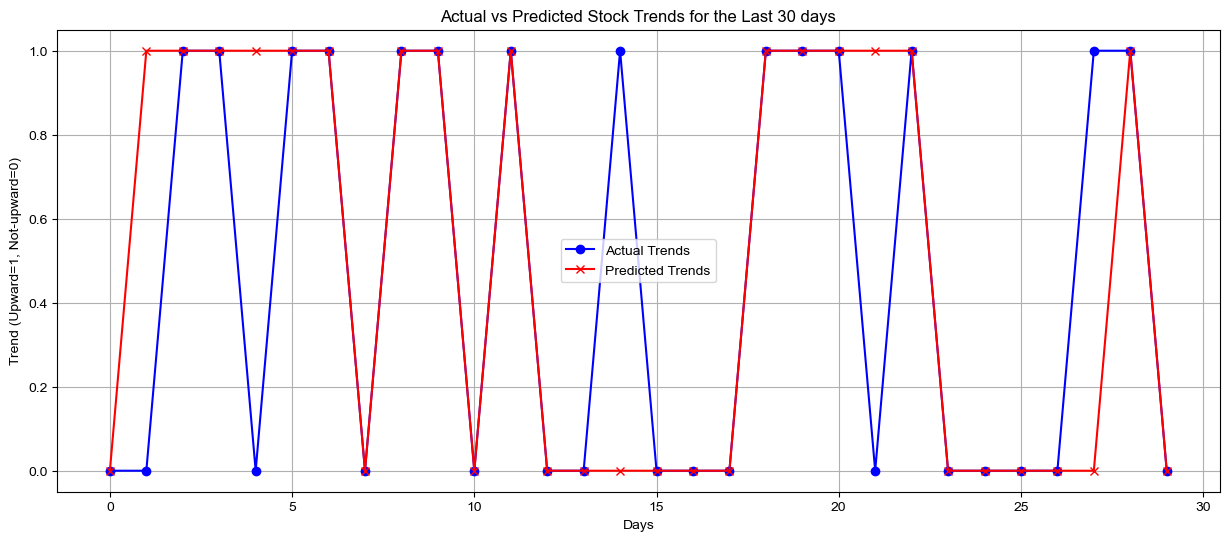

Accuracy: 0.8333
Precision: 0.8000
Recall: 0.8571
F1 Score: 0.8276


In [24]:
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, recall_score, f1_score


df = pd.read_csv('Combined_DIS_filled.csv')
df = df.dropna(subset=['Actual Sentiment'])
df = pd.concat([df, pd.get_dummies(df['Actual Sentiment'], prefix='Sentiment')], axis=1)


df = df.drop(['Date', 'Actual Sentiment'], axis=1)

# Creating a 'Trend' column for predicting stock market trends
df['Trend'] = df['Close'].pct_change().apply(lambda x: 1 if x > 0 else 0)
df = df.dropna()

# Define features (excluding the target variable 'Trend') and target variable
features = df.drop('Trend', axis=1)
target = df['Trend']

# Splitting the dataset
split_point = len(df) - 30
X_train, X_test = features.iloc[:split_point], features.iloc[split_point:]
y_train, y_test = target.iloc[:split_point], target.iloc[split_point:]


# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for LSTM [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=1, shuffle=False)


# Make predictions on the test set
predicted_trends = model.predict(X_test)
predicted_trends = [1 if x[0] > 0.5 else 0 for x in predicted_trends]  # Threshold the predictions

# Visualization: Actual vs Predicted Trends for the Last 30 days
plt.figure(figsize=(15, 6))

plt.plot(y_test.reset_index(drop=True), color='blue', label='Actual Trends', marker='o')
plt.plot(predicted_trends, color='red', label='Predicted Trends', marker='x')
plt.title('Actual vs Predicted Stock Trends for the Last 30 days')
plt.xlabel('Days')
plt.ylabel('Trend (Upward=1, Not-upward=0)')
plt.legend()
plt.grid(True)
plt.show()


# Calculate Accuracy, Precision, Recall, and F1 score
accuracy = accuracy_score(y_test, predicted_trends)
precision = precision_score(y_test, predicted_trends)
recall = recall_score(y_test, predicted_trends)
f1 = f1_score(y_test, predicted_trends)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Logistic Regression applied on DIS Base Data

Accuracy: 0.5000
Precision: 0.5217
Recall: 0.7500
F1 Score: 0.6154


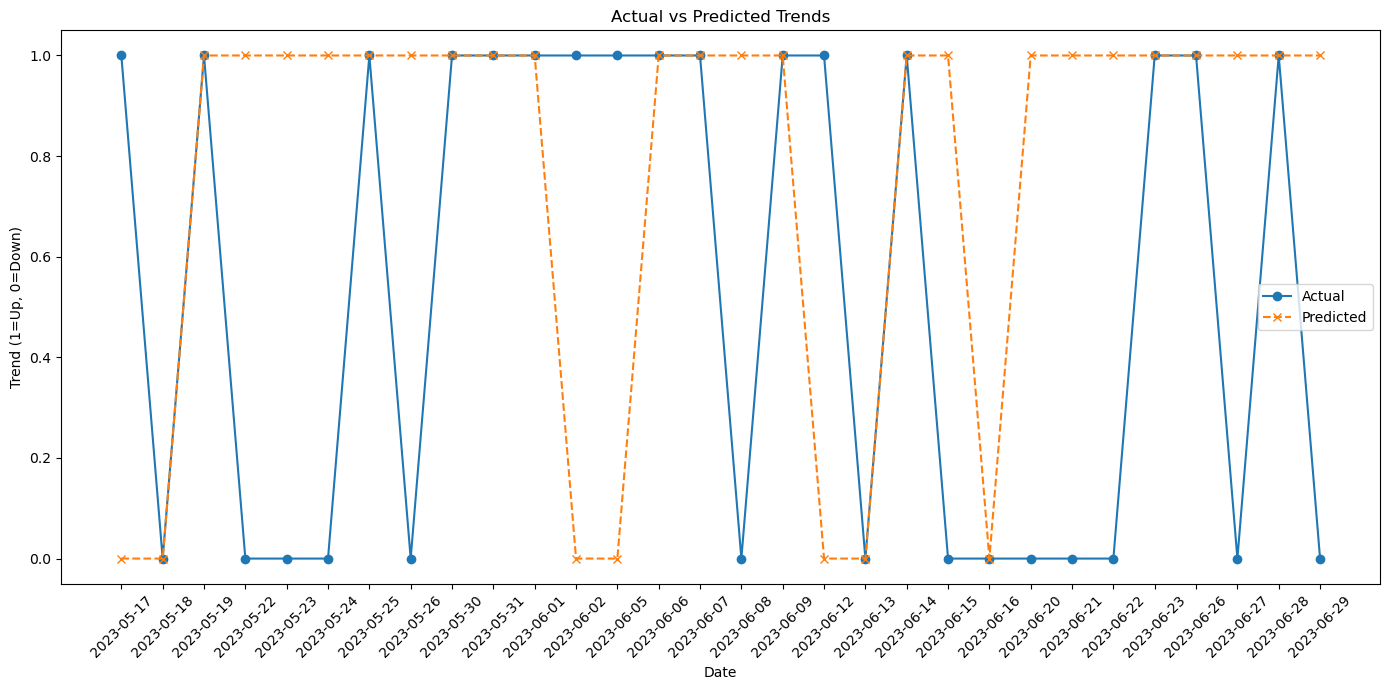

In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv('DIS.csv')

# Calculate the trend
df['Trend'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# Create features
df['Return'] = df['Close'].pct_change()
df['Rolling_Mean'] = df['Close'].rolling(window=5).mean()
df['Rolling_Std'] = df['Close'].rolling(window=5).std()

df.dropna(inplace=True)

# Features and target
X = df[['Return', 'Rolling_Mean', 'Rolling_Std', 'Volume']]
y = df['Trend']

# Train-test split
train_size = len(df) - 30
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Standardizing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Create results_df
results_df = pd.DataFrame({
    'Date': df['Date'][train_size:].values,
    'Trend': y_test.values,
    'Predicted_Trend': y_pred
})

# Visual comparison
plt.figure(figsize=(14, 7))
plt.plot(results_df['Date'], results_df['Trend'], marker='o', label='Actual')
plt.plot(results_df['Date'], results_df['Predicted_Trend'], marker='x', linestyle='--', label='Predicted')
plt.title("Actual vs Predicted Trends")
plt.xlabel("Date")
plt.ylabel("Trend (1=Up, 0=Down)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# Logistic Regression applied on DIS Technical Indicators

Accuracy: 0.6
Precision: 0.6666666666666666
Recall: 0.15384615384615385
F1 score: 0.25


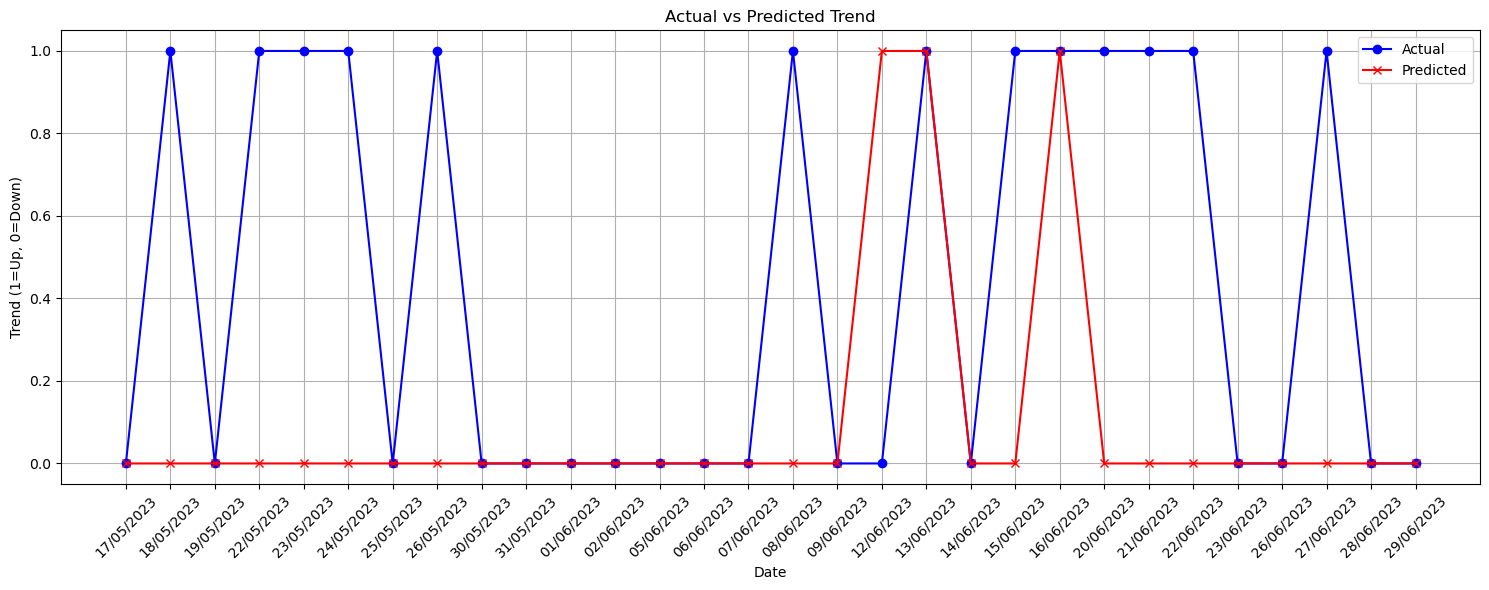

In [4]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('DIS_TechIndicators.csv')

df['Trend'] = df['Close'].shift(-1) < df['Close']
df['Trend'] = df['Trend'].astype(int)
df.dropna(inplace=True)

features = ['Open','Close','High','Low','Volume', 'SMA', 'EMA', 'MACD', 'RSI', 'ATR', 'OBV', 'Percent_R', 'CCI', 'ROC', '%D', '%K']

# Separate the last 30 days for testing
train_df = df.iloc[:-30]
test_df = df.iloc[-30:]

X_train = train_df[features]
y_train = train_df['Trend']

X_test = test_df[features]
y_test = test_df['Trend']

# Model training
model = LogisticRegression(C=0.01, penalty='l1', solver='liblinear', max_iter=10000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

# Plotting the graph
plt.figure(figsize=(15, 6))
dates = test_df['Date']

plt.plot(dates, y_test, color='blue', label='Actual', marker='o')
plt.plot(dates, y_pred, color='red', label='Predicted', marker='x')

plt.title('Actual vs Predicted Trend')
plt.xlabel('Date')
plt.ylabel('Trend (1=Up, 0=Down)')
plt.xticks(dates, rotation=45)  

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Logistic Regression applied on DIS News sentiments

C:\Users\sheet\AppData\Local\Temp\ipykernel_2500\235764177.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Actual Sentiment'].fillna(method='ffill', inplace=True)
C:\Users\sheet\AppData\Local\Temp\ipykernel_2500\235764177.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Sentiment value'].fillna(method='ffill', inplace=True)


Accuracy:  0.5390895061728396
Precision: 0.5555555555555556
Recall: 0.38461538461538464
F1 score: 0.4545454545454546


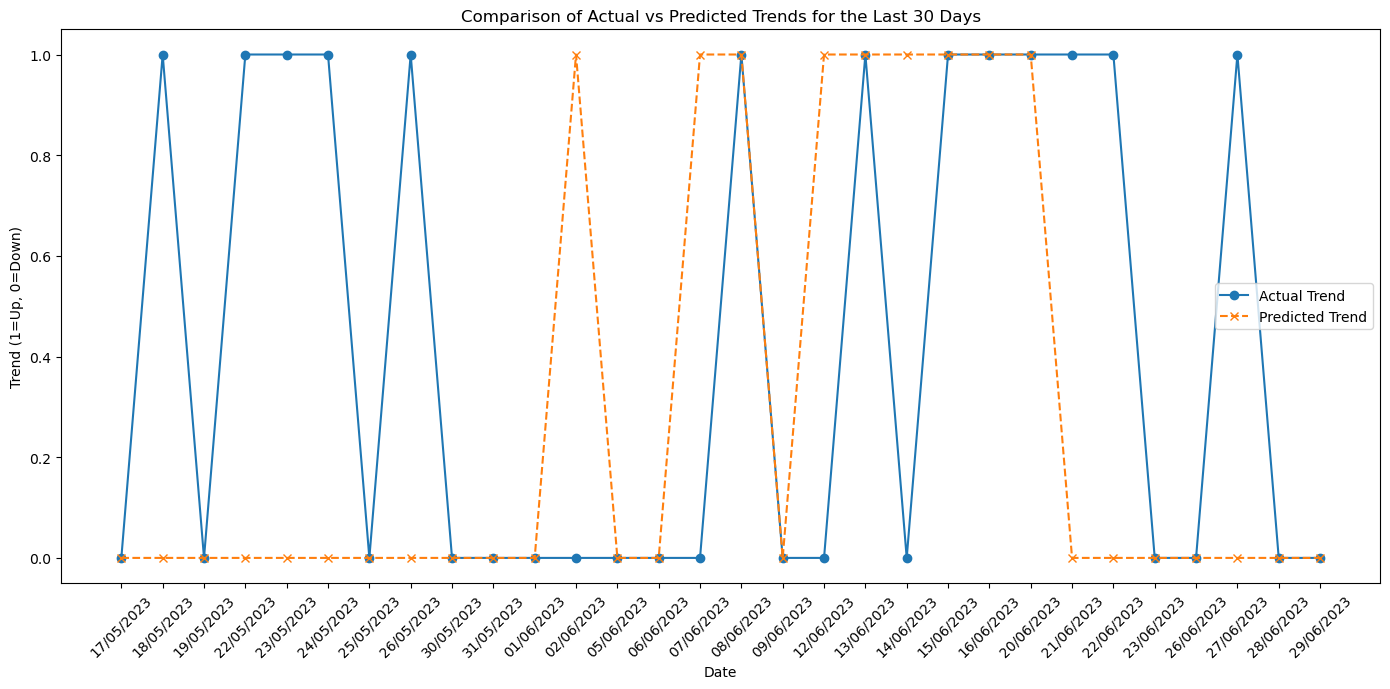

In [5]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt

df = pd.read_csv('Combined_DIS_filled.csv')

train_df = df.iloc[:-30]
test_df = df.iloc[-30:]

# Remove rows with blank values in 'Actual Sentiment' and 'Sentiment value' for training set
train_df = train_df.dropna(subset=['Actual Sentiment', 'Sentiment value'])

# For the test set, replace the blank values using ffill
test_df['Actual Sentiment'].fillna(method='ffill', inplace=True)
test_df['Sentiment value'].fillna(method='ffill', inplace=True)


# Combine train and test dataframes back
df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)

le = LabelEncoder()
df['Actual Sentiment'] = le.fit_transform(df['Actual Sentiment'])

# Generating Trend
df['Trend'] = (df['Close'].shift(-1) < df['Close']).astype(int)

# Features and target
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SMA', 'EMA', 'MACD',  'RSI', 'ATR', 'OBV', 'Percent_R', 'ADX', 'CCI', 'ROC', 'Percent_Change', 'Signal_Line', '%D', '%K', 'Actual Sentiment', 'Sentiment value']
   

X = df[features].iloc[:-30]
y = df['Trend'].iloc[:-30]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Model and Cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
model = LogisticRegression(max_iter=10000, class_weight='balanced')
accuracies = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')

df.iloc[-30:] = df.iloc[-30:].fillna(method='ffill')

# Training and making predictions on the last 30 days
df.iloc[-30:] = df.iloc[-30:].fillna(method='bfill')

model.fit(X_scaled, y)
X_last_30 = df[features].iloc[-30:]
X_last_30_scaled = scaler.transform(X_last_30)
predictions_last_30 = model.predict(X_last_30_scaled)

# Extract actual trends for the last 30 days
actual_trends_last_30 = df['Trend'].tail(30)

# Metrics
print("Accuracy: ", accuracies.mean())
print("Precision:", precision_score(actual_trends_last_30, predictions_last_30))
print("Recall:", recall_score(actual_trends_last_30, predictions_last_30))
print("F1 score:", f1_score(actual_trends_last_30, predictions_last_30))
#print(classification_report(actual_trends_last_30, predictions_last_30))

# Visualization
comparison_df = df.tail(30).copy()
comparison_df['Predicted_Trend'] = predictions_last_30

plt.figure(figsize=(14, 7))
plt.plot(comparison_df['Date'], comparison_df['Trend'], marker='o', label='Actual Trend')
plt.plot(comparison_df['Date'], comparison_df['Predicted_Trend'], marker='x', linestyle='--', label='Predicted Trend')
plt.title('Comparison of Actual vs Predicted Trends for the Last 30 Days')
plt.xlabel('Date')
plt.ylabel('Trend (1=Up, 0=Down)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# Prophet applied on DIS Base data

18:01:00 - cmdstanpy - INFO - Chain [1] start processing
18:01:00 - cmdstanpy - INFO - Chain [1] done processing


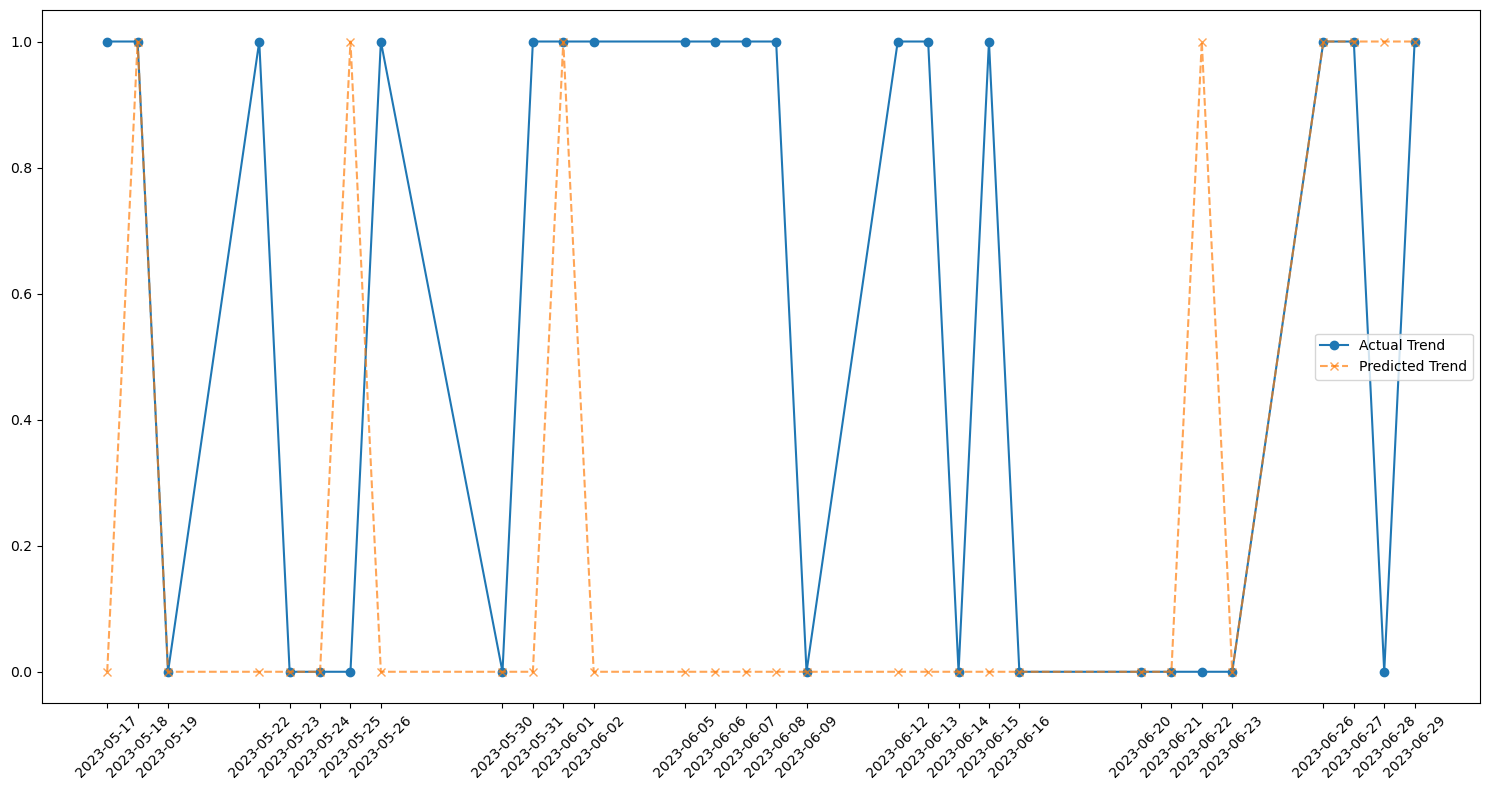

Accuracy: 0.5000
Precision: 0.6250
Recall: 0.2941
F1 Score: 0.4000


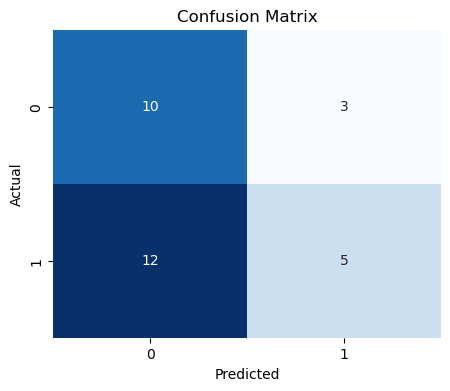

In [3]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Read the dataset
df = pd.read_csv('DIS.csv')

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Calculate trend: 1 for increasing and 0 for decreasing or no change
df['trend'] = (df['Close'].diff() > 0).astype(int)

# Splitting data
train = df.iloc[:-30].copy()
test = df.iloc[-30:].copy()

train.rename(columns={'Date': 'ds', 'trend': 'y'}, inplace=True)

model = Prophet(
    daily_seasonality=True, 
    yearly_seasonality=True, 
    weekly_seasonality=True, 
    changepoint_prior_scale=0.01, 
    seasonality_prior_scale=0.1   
)

model.fit(train)

# Make predictions for the last 30 days
future = test[['Date']].rename(columns={'Date': 'ds'})
forecast = model.predict(future)
forecast['trend_pred'] = (forecast['yhat'].round() > 0).astype(int)
plt.figure(figsize=(15, 8))

plt.plot(test['Date'], test['trend'], 'o-', label='Actual Trend')

plt.plot(test['Date'], forecast['trend_pred'], 'x--', label='Predicted Trend', alpha=0.7)

plt.xticks(test['Date'], rotation=45)

plt.legend()
plt.tight_layout()
plt.show()


# Calculate metrics
accuracy = accuracy_score(test['trend'], forecast['trend_pred'])
precision = precision_score(test['trend'], forecast['trend_pred'])
recall = recall_score(test['trend'], forecast['trend_pred'])
f1 = f1_score(test['trend'], forecast['trend_pred'])

# Print out the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

confusion = confusion_matrix(test['trend'], forecast['trend_pred'])
plt.figure(figsize=(5, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


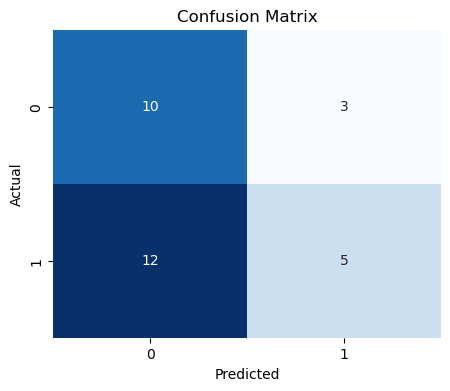

In [4]:
confusion = confusion_matrix(test['trend'], forecast['trend_pred'])
plt.figure(figsize=(5, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Prophet applied on DIS technical Indicators

18:02:28 - cmdstanpy - INFO - Chain [1] start processing
18:02:28 - cmdstanpy - INFO - Chain [1] done processing


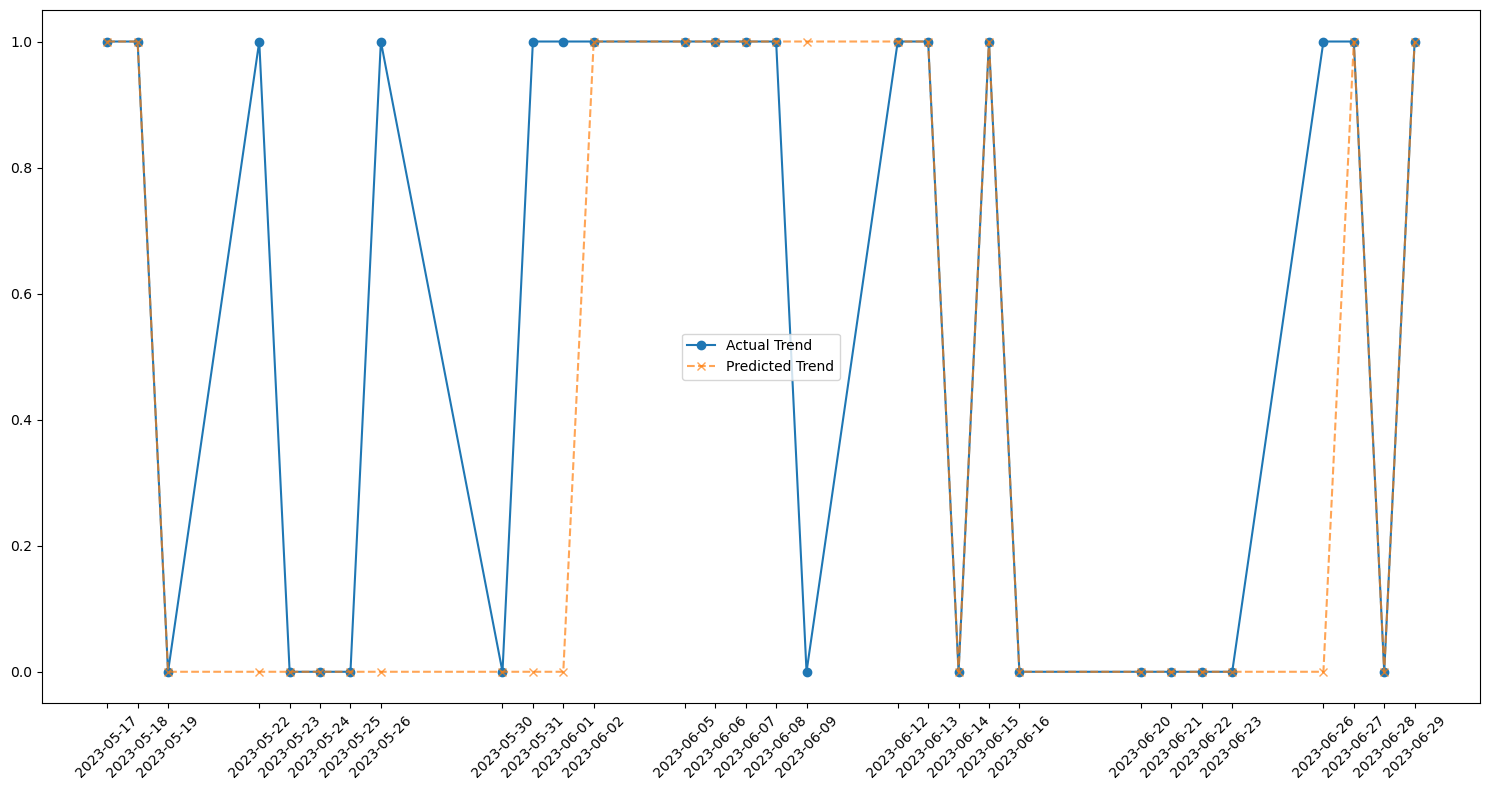

Accuracy: 0.8000
Precision: 0.9231
Recall: 0.7059
F1 Score: 0.8000


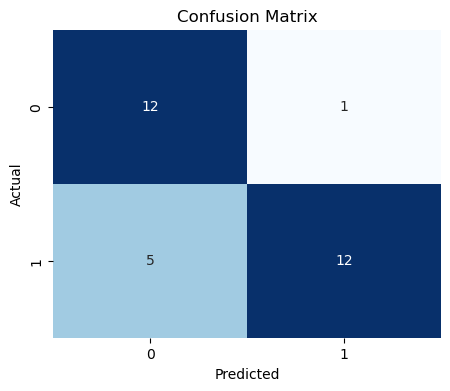

In [5]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv('DIS_TechIndicators.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Calculate trend: 1 for increasing and 0 for decreasing or no change
df['trend'] = (df['Close'].diff() > 0).astype(int)

train = df.iloc[:-30].copy()
test = df.iloc[-30:].copy()

train.rename(columns={'Date': 'ds', 'trend': 'y'}, inplace=True)


# Initialize Prophet model
model = Prophet(
    daily_seasonality=True, 
    yearly_seasonality=True, 
    weekly_seasonality=True, 
    changepoint_prior_scale=0.1, 
    seasonality_prior_scale=0.5,
    interval_width=0.85
       
)


model.add_regressor('Close')
model.add_regressor('SMA')
model.add_regressor('EMA')
model.add_regressor('MACD')
model.add_regressor('Percent_R')
model.add_regressor('Signal_Line')

model.fit(train)

# Make predictions for the last 30 days
future = test[['Date','Close','SMA','EMA','MACD','Percent_R','Signal_Line']].rename(columns={'Date': 'ds'})
forecast = model.predict(future)
forecast['trend_pred'] = (forecast['yhat'].round() > 0).astype(int)

# Plot actual vs predicted trend
plt.figure(figsize=(15, 8))
plt.plot(test['Date'], test['trend'], 'o-', label='Actual Trend')
plt.plot(test['Date'], forecast['trend_pred'], 'x--', label='Predicted Trend', alpha=0.7)
plt.xticks(test['Date'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Calculate metrics
accuracy = accuracy_score(test['trend'], forecast['trend_pred'])
precision = precision_score(test['trend'], forecast['trend_pred'])
recall = recall_score(test['trend'], forecast['trend_pred'])
f1 = f1_score(test['trend'], forecast['trend_pred'])

# Print out the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

confusion = confusion_matrix(test['trend'], forecast['trend_pred'])
plt.figure(figsize=(5, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Prophet applied on DIS News sentiment data 

18:03:42 - cmdstanpy - INFO - Chain [1] start processing
18:03:42 - cmdstanpy - INFO - Chain [1] done processing


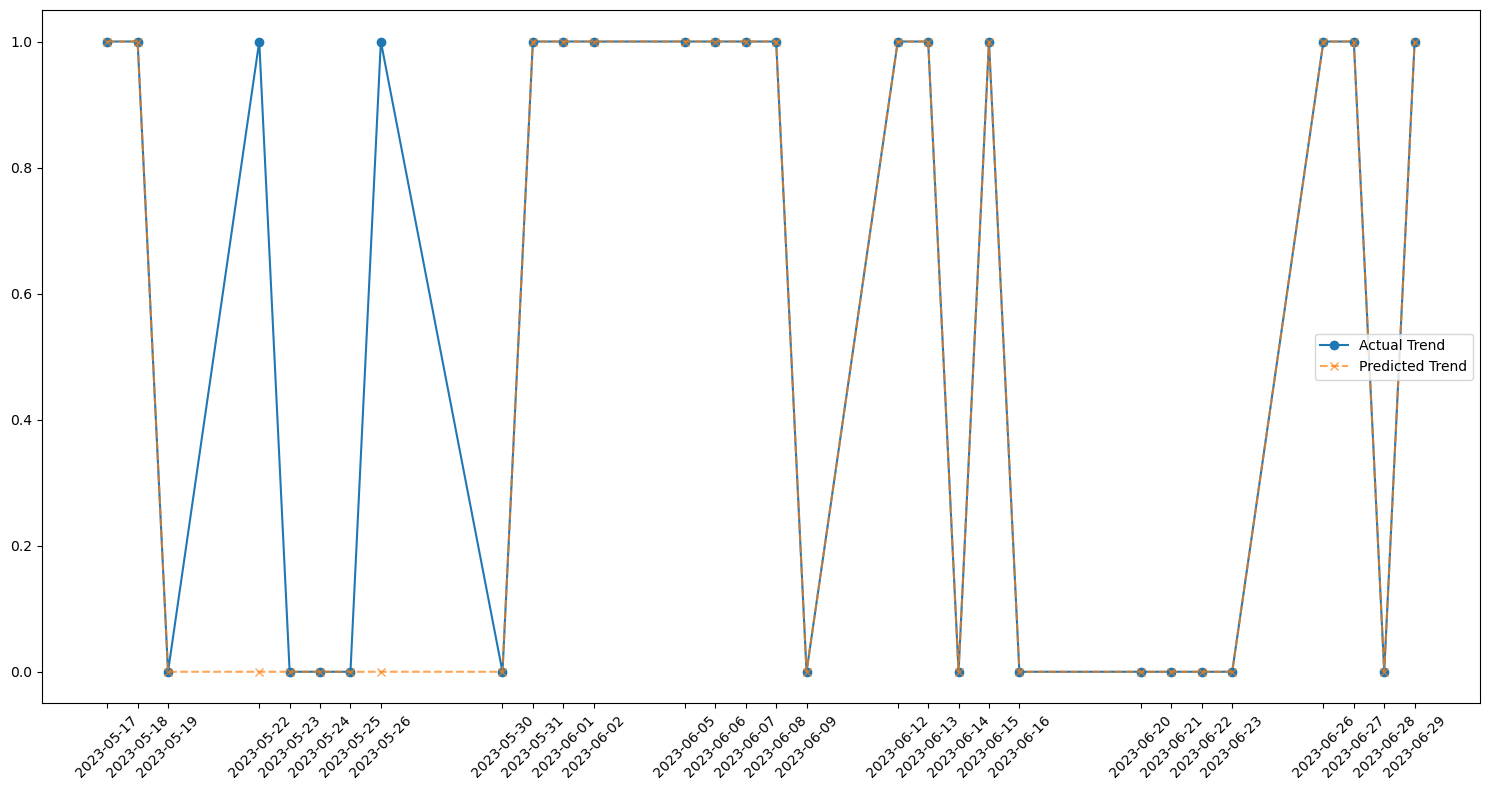

Accuracy: 0.9333
Precision: 1.0000
Recall: 0.8824
F1 Score: 0.9375


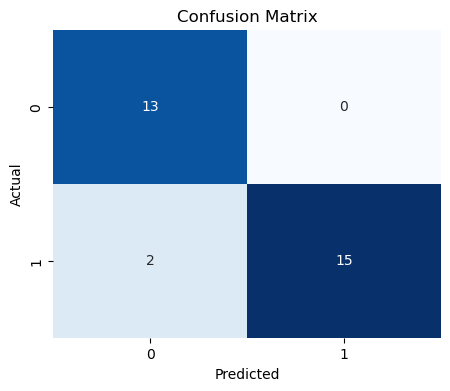

In [7]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv('Combined_DIS_filled.csv')

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Calculate trend: 1 for increasing and 0 for decreasing or no change
df['trend'] = (df['Close'].diff() > 0).astype(int)

# Splitting data
train = df.iloc[:-30].copy()
test = df.iloc[-30:].copy()

# Drop rows with null values in 'Actual Sentiment' and 'Sentiment value' ONLY for train
train = train.dropna(subset=['Actual Sentiment', 'Sentiment value'])

# Rename columns for Prophet
train.rename(columns={'Date': 'ds', 'trend': 'y'}, inplace=True)


# Initialize Prophet model
model = Prophet(
    daily_seasonality=True, 
    yearly_seasonality=True, 
    weekly_seasonality=True, 
    changepoint_prior_scale=0.1, 
    seasonality_prior_scale=0.5,
    interval_width=0.85
       
)

sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
train['Actual Sentiment'] = train['Actual Sentiment'].map(sentiment_mapping)
test['Actual Sentiment'] = test['Actual Sentiment'].map(sentiment_mapping)


model.add_regressor('Actual Sentiment')
model.add_regressor('Sentiment value')
model.add_regressor('SMA')
model.add_regressor('EMA')
model.add_regressor('MACD')
model.add_regressor('Percent_R')
model.add_regressor('Open')
model.add_regressor('Close')
model.add_regressor('Signal_Line')
model.add_regressor('RSI')
model.add_regressor('%D')


model.fit(train)

# Interpolate NaN values for the 'Actual Sentiment' and 'Sentiment value' columns in the test set
test['Actual Sentiment'] = test['Actual Sentiment'].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
test['Sentiment value'] = test['Sentiment value'].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')


# Make predictions for the last 30 days
future = test[['Date', 'Actual Sentiment', 'Sentiment value','SMA','EMA','MACD','Percent_R','Open','Close','Signal_Line','RSI','%D']].rename(columns={'Date': 'ds'})
forecast = model.predict(future)
forecast['trend_pred'] = (forecast['yhat'].round() > 0).astype(int)

# Plot actual vs predicted trend
plt.figure(figsize=(15, 8))
plt.plot(test['Date'], test['trend'], 'o-', label='Actual Trend')
plt.plot(test['Date'], forecast['trend_pred'], 'x--', label='Predicted Trend', alpha=0.7)
plt.xticks(test['Date'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Calculate metrics
accuracy = accuracy_score(test['trend'], forecast['trend_pred'])
precision = precision_score(test['trend'], forecast['trend_pred'])
recall = recall_score(test['trend'], forecast['trend_pred'])
f1 = f1_score(test['trend'], forecast['trend_pred'])

# Print out the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

confusion = confusion_matrix(test['trend'], forecast['trend_pred'])
plt.figure(figsize=(5, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


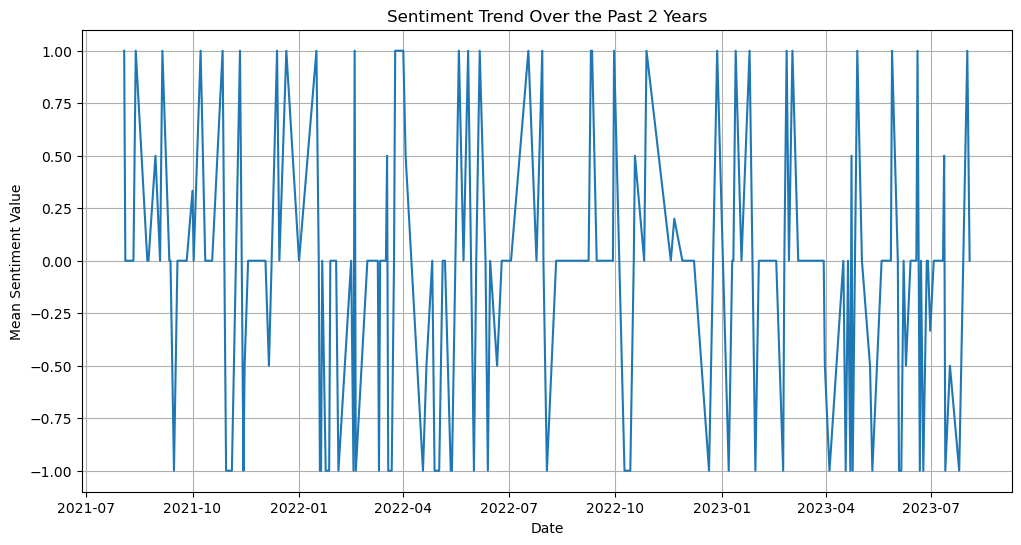

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('NewsSentiments_DIS.csv', encoding='latin1')
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

two_years_ago = df['Date'].max() - pd.DateOffset(years=2)

# Filter the dataset for the past 2 years
df = df[df['Date'] >= two_years_ago]

sentiment_mapping = {'Negative': -1, 'Neutral': 0, 'Positive': 1}
df['Sentiment Value'] = df['Actual Sentiment'].map(sentiment_mapping)

# Group data by date and calculate mean sentiment value
daily_sentiment = df.groupby('Date')['Sentiment Value'].mean()


plt.figure(figsize=(12, 6))
plt.plot(daily_sentiment.index, daily_sentiment.values)
plt.title('Sentiment Trend Over the Past 2 Years')
plt.xlabel('Date')
plt.ylabel('Mean Sentiment Value')
plt.grid(True)
plt.show()

